# Perspective Transform

First, you need to select four points in your "source" image and map them to four points in our "destination" image, which will be the top-down view

The grid squares on the ground in the simulator represent 1 meter square each so this mapping will also provide us with a distance estimate to everything in the ground plane in the field of view.

Perspective transforms involve some complicated geometry but here you'll use the OpenCV functions cv2.getPerspectiveTransform() and cv2.warpPerspective() to do the heavy lifting (for more on this and other geometric transforms you can do with OpenCV, check out [this page](https://docs.opencv.org/3.4/da/d6e/tutorial_py_geometric_transformations.html)).

So, you'll want to perform the following steps:

- Define 4 source points, in this case, the 4 corners of a grid cell in the image above.
- Define 4 destination points (must be listed in the same order as source points!).
- Use cv2.getPerspectiveTransform() to get M, the transform matrix.
- Use cv2.warpPerspective() to apply M and warp your image to a top-down view.

To perform the first step of selecting source points, you could perform some image analysis to identify lines and corners in the image, but you'll only have to do this once, so it is fine to just select points manually using an interactive matplotlib window

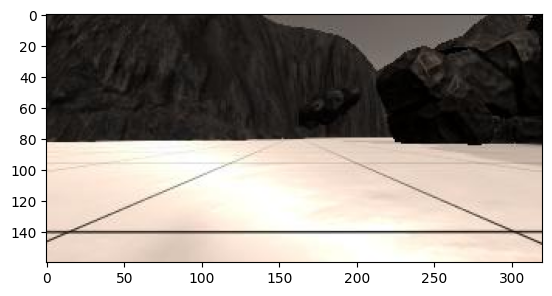

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Uncomment the next line for use in a Jupyter notebook
# This enables the interactive matplotlib window
#%matplotlib notebook
image = mpimg.imread('images/example_grid1.jpg')
plt.imshow(image)
plt.show() 

In an interactive matplotlib window (yours may look different depending on OS and graphics backend, but should have the same features) you can read off the pixel coordinates of the cursor in the lower left-hand corner of the window. You can zoom in on each corner of the grid cell in the image (using the zoom tool in the upper-right) to get a better measurement. Take note of the x and y coordinates of each corner.

# Choosing destination points

With the source points chosen, all that's left is choosing destination points. In this case, it makes sense to choose a square set of points so that square meters in the grid are represented by square areas in the destination image. Mapping a one-square-meter grid cell in the image to a square that is 10x10 pixels, for example, implies a mapping of each pixel in the destination image to a 0.1x0.1 meter square on the ground.

*NOTE: mapping each square in the grid to a 10x10 pixel square in your destination image is just a suggestion, you could choose some other scaling. However, some kind of square is preferable so that the scale of the world in x and y is the same in your output.*

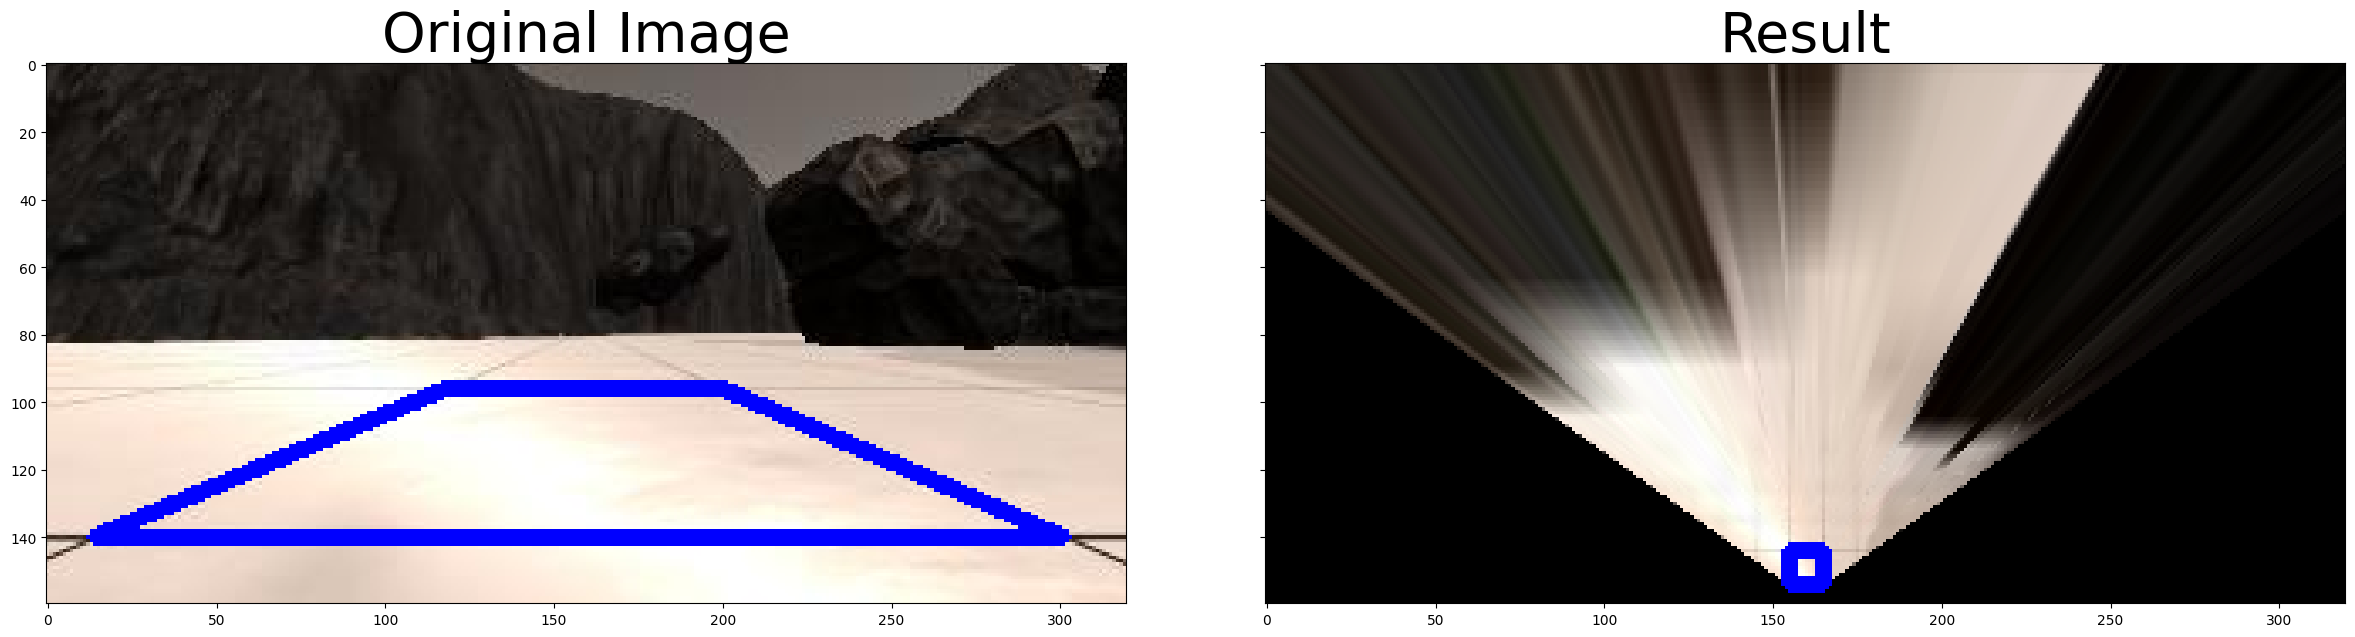

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

image = mpimg.imread('images/ example_grid1.jpg')

# Convert the image to a writable NumPy array
image_copy = np.copy(image)

def perspect_transform(img, src, dst):

    # Get transform matrix using cv2.getPerspectivTransform()
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp image using cv2.warpPerspective()
    # keep same size as input image
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    # Return the result
    return warped

# Define calibration box in source (actual) and destination (desired) coordinates
# These source and destination points are defined to warp the image
# to a grid where each 10x10 pixel square represents 1 square meter
dst_size = 5 
# Set a bottom offset to account for the fact that the bottom of the image 
# is not the position of the rover but a bit in front of it
bottom_offset = 6
source = np.float32([[14, 140], [301 ,140],[200, 96], [118, 96]])
destination = np.float32([[image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - 2*dst_size - bottom_offset], 
                  [image.shape[1]/2 - dst_size, image.shape[0] - 2*dst_size - bottom_offset],
                  ])

warped = perspect_transform(image, source, destination)
# Draw Source and destination points on images (in blue) before plotting
cv2.polylines(image_copy, np.int32([source]), True, (0, 0, 255), 3)
cv2.polylines(warped, np.int32([destination]), True, (0, 0, 255), 3)
# Display the original image and binary               
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6), sharey=True)
f.tight_layout()
ax1.imshow(image_copy)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(warped, cmap='gray')
ax2.set_title('Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
#plt.show() # Uncomment if running on your local machine